In [1]:
# imports  
import numpy as np
backend='nbagg' # Use the 'nbagg' backend to render and you can zoom and pan plots.  
backend='inline' # 
if backend=='nbagg':
    import matplotlib
    matplotlib.use('nbagg') # Use the 'nbagg' backend
else:
    # magic command to render inline
    %matplotlib inline 
    
#import matplotlib.pyplot must be after matplotlib.use('nbagg') 
import matplotlib.pyplot as plt

We begin by creating a synthetic wedge model to re-create figure 4

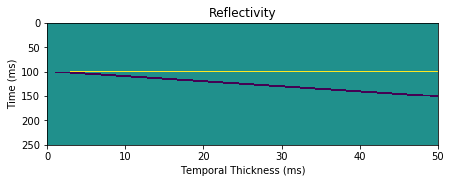

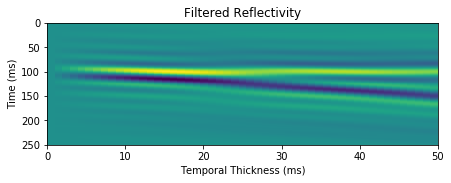

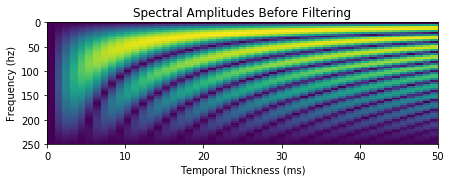

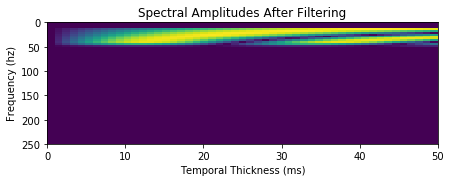

In [2]:
# generate wedge model
# vertical sampling parameters
dt = 1   # ms
to = 0   # start time
tf = 250 # end time
nt = (tf-to)+1 # number of time samples

# lateral sampling parameters
dx = 1   # ms
xo = 0   # start wedge
xf = 50  # end wedge
nx = (xf-xo)/dx+1 # number of lateral samples

# reflection parameters
# top event location
t_top = 100
# convert to index
i_top = int(t_top/dt)+1

# slope for reflection
slope = 1
# thickness of reflector
thck = 2

# initialize numpy array for wedge model as zeroes
model = np.zeros((nx,nt),dtype='float32')
# place positive and negative reflectivity
for i in range(nx): 
    # place positive reflection
    model[i,i_top-thck:i_top+thck] = 2
    # place negative reflection
    model[i,(i_top+i*slope)-thck:(i_top+i*slope)+thck] -= 2
    
# plot model
fig0 = plt.figure(figsize=(7,7))
plt.title('Reflectivity')
plt.ylabel('Time (ms)')
plt.xlabel('Temporal Thickness (ms)')
plt.imshow(model.T,extent=[xo,xf,tf,to], aspect=.0625)
plt.show()

# apply filter to ideal model to create synthetic seismic for Figure 1
deltat=.001
itrace=0
trace=model[0]
frequencies=np.fft.rfftfreq(trace.size,d=deltat)

# apply high cut filter using numpy library
ramp_freq=np.array([8,10,40,50])
ramp_amp =np.array([0,1.0, 1.0,.0])
ramp=np.square(np.cos(np.pi/2.0*(1.0-np.interp(frequencies,ramp_freq,ramp_amp))))
model_filterred = np.zeros((nx,nt-1),dtype='float32') 
model_fourier   = np.zeros((nx,frequencies.size),dtype='float32')
model_fourier_filtered = np.zeros((nx,frequencies.size),dtype='float32')
for itrace in range(model.shape[0]):
    trace=model[itrace]
    TRACE=np.fft.rfft(trace)
    TRACE_FILTERRED=ramp*TRACE
    trace_filterred=np.fft.irfft(TRACE_FILTERRED)
    model_fourier[itrace,:]=np.abs(TRACE)
    model_filterred[itrace,:]=trace_filterred 
    model_fourier_filtered[itrace,:]=np.abs(TRACE_FILTERRED)
    
fig1 = plt.figure(figsize=(7,7))
plt.title('Filtered Reflectivity')
plt.ylabel('Time (ms)')
plt.xlabel('Temporal Thickness (ms)')
plt.imshow(model_filterred.T,extent=[xo,xf,tf,to], aspect=.0625)
plt.show()

fig2 = plt.figure(figsize=(7,7))
plt.title('Spectral Amplitudes Before Filtering')
plt.ylabel('Frequency (hz)')
plt.xlabel('Temporal Thickness (ms)')
plt.imshow(model_fourier[:,0:frequencies.size/2].T,extent=[xo,xf,frequencies[frequencies.size-1]/2,frequencies[0]], aspect=.0625)
plt.show()

fig3 = plt.figure(figsize=(7,7))
plt.title('Spectral Amplitudes After Filtering')
plt.ylabel('Frequency (hz)')
plt.xlabel('Temporal Thickness (ms)')
plt.imshow(model_fourier_filtered[:,0:frequencies.size/2].T,extent=[xo,xf,frequencies[frequencies.size-1]/2,frequencies[0]], aspect=.0625)
plt.show()